In [12]:
import os
import re
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_rows', 350)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [13]:
igm = pd.read_csv('miniJPasDados.csv', skiprows=[0])

In [14]:
igm

,ALPHA_J2000,DELTA_J2000,class_Sextractor,class_SDSS,pdf,uJAVA,J0378,J0390,J0400,J0410,J0420,J0430,J0440,J0450,J0460,J0470,J0480,J0490,J0500,J0510,J0520,J0530,J0540,J0550,J0560,J0570,J0580,J0590,J0600,J0610,J0620,J0630,J0640,J0650,J0660,J0670,J0680,J0690,J0700,J0710,J0720,J0730,J0740,J0750,J0760,J0770,J0780,J0790,J0800,J0810,J0820,J0830,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,uJPAS,gSDSS,rSDSS,iSDSS,c_r,mu_max_mag_apertu,fwhm,alb
0,214.921135,53.086425,0.047,6,0.083,22.463,23.624,23.218,23.118,22.587,22.584,22.068,21.949,21.806,21.609,21.440,21.389,21.427,21.238,21.397,21.509,21.289,21.380,21.145,21.081,20.653,20.998,20.849,20.714,21.278,20.780,20.714,20.857,20.712,20.853,20.729,20.755,20.723,20.742,20.691,20.698,20.441,20.727,20.584,20.807,20.355,21.281,20.339,20.423,21.649,20.565,20.005,19.667,20.475,20.405,23.952,99.000,20.463,99.000,20.433,24.095,23.502,21.712,20.805,20.706,0.383900,1.009748,0.000265,1.020400
1,214.943803,53.073418,0.001,3,0.000,22.764,22.057,22.795,24.327,22.223,26.931,21.554,24.804,21.849,23.345,22.455,23.463,22.473,23.321,22.668,22.293,22.339,22.872,21.836,99.000,99.000,21.942,22.183,21.986,21.902,21.083,21.956,21.219,21.443,21.660,21.313,21.319,21.413,21.699,20.523,21.470,20.845,21.041,21.091,20.846,21.381,20.770,21.101,21.397,20.880,20.932,99.000,19.578,99.000,21.066,22.551,21.062,21.824,99.000,20.943,99.000,24.213,22.925,21.727,21.054,0.940832,1.038458,0.001060,1.042227
2,214.910729,53.092994,0.001,3,0.000,24.430,22.747,23.315,23.121,24.128,23.771,23.319,23.354,23.245,23.559,23.153,24.428,22.882,21.982,23.088,21.889,22.737,23.013,22.794,23.141,17.838,23.056,22.879,22.517,23.312,23.583,99.000,23.931,22.910,22.940,22.589,22.960,24.276,22.484,22.781,22.433,22.928,23.145,25.312,21.875,22.906,23.511,22.347,99.000,99.000,23.678,99.000,21.137,22.003,23.266,99.000,99.000,23.552,99.000,25.614,99.000,24.124,23.380,22.880,22.882,0.439484,1.019185,0.000672,1.227927
3,215.013334,53.034109,0.020,3,0.178,99.000,24.693,99.000,99.000,25.517,24.771,24.738,25.403,99.000,24.205,99.000,99.000,99.000,99.000,24.221,22.970,26.082,23.601,23.960,99.000,23.731,24.974,22.641,99.000,24.220,99.000,24.975,23.173,23.015,24.384,24.784,23.099,23.388,99.000,23.580,22.950,23.208,23.462,26.509,22.856,23.981,99.000,23.773,22.151,99.000,23.920,99.000,23.166,22.466,23.516,99.000,99.000,22.953,99.000,22.692,99.000,26.936,25.441,23.549,23.496,0.138611,0.989366,0.000504,1.266687
4,215.255290,52.890241,0.009,3,0.000,22.710,22.575,22.804,23.054,23.160,22.374,22.245,22.490,22.112,22.202,21.541,21.655,21.501,21.796,21.530,21.472,21.428,21.407,21.400,21.254,21.029,21.717,21.438,21.098,21.313,21.027,21.150,21.683,21.201,21.291,21.160,21.258,21.093,20.932,21.239,20.988,21.210,21.467,21.126,21.391,20.910,99.000,20.712,21.619,20.679,21.579,21.336,20.495,21.844,21.593,20.807,99.000,20.843,24.191,20.406,99.000,23.293,21.775,21.279,21.055,0.576406,1.028866,0.000426,1.117930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16382,215.064348,52.820511,0.002,3,0.000,25.018,22.979,23.647,23.408,24.095,22.704,22.816,23.038,23.110,23.243,22.429,23.079,23.422,22.482,99.000,22.440,23.339,22.285,22.340,21.833,22.960,22.272,22.930,22.496,22.947,25.548,22.766,22.878,22.292,22.611,22.567,23.045,22.215,22.558,23.404,22.908,22.057,22.203,23.320,23.271,22.520,22.354,22.982,99.000,22.693,22.251,23.302,22.087,21.270,22.180,23.037,22.511,99.000,21.919,99.000,23.396,99.000,22.968,22.821,22.336,0.439144,1.013136,0.000508,1.080877
16383,214.880918,52.926937,0.206,3,0.522,25.541,99.000,99.000,23.870,23.800,23.771,99.000,22.976,23.036,24.372,23.887,99.000,23.461,25.249,25.712,23.666,24.188,22.880,22.230,22.451,22.695,25.791,22.247,99.000,22.923,23.843,23.019,22.540,21.955,22.753,22.097,22.845,22.764,23.437,21.830,22.704,21.742,21.732,21.

In [57]:
df = igm.drop(igm.columns[[range(5, 65)]], axis=1)
df = df.drop(df.columns[[0, 1, 2, 3]], axis=1)
df.sort_values("pdf")

,pdf,c_r,mu_max_mag_apertu,fwhm,alb
8193,0.0,0.699383,1.025126,0.000819,1.042569
7096,0.0,0.764397,1.040538,0.000555,1.062032
7097,0.0,0.812799,1.007676,0.000659,1.879354
7099,0.0,0.768934,1.030071,0.000620,1.123397
7100,0.0,0.734095,1.032924,0.000600,1.121565
...,...,...,...,...,...
8567,1.0,0.199184,0.979488,0.000206,1.013263
8568,1.0,0.296835,0.990559,0.000214,1.013718
14197,1.0,0.364496,1.003694,0.000331,1.081381
12125,1.0,0.383448,1.007516,0.000250,1.001390


In [58]:
df.pdf.value_counts()

0.000    8830
1.000    2640
0.001     349
0.002     173
0.003     122
         ... 
0.687       1
0.334       1
0.805       1
0.222       1
0.918       1
Name: pdf, Length: 851, dtype: int64

In [59]:
df1 = df[df.pdf == 0.0]
df2 = df[df.pdf == 1.0]

dfamostra = pd.concat([df1, df2])

In [60]:
dfamostra.sort_values("pdf")

,pdf,c_r,mu_max_mag_apertu,fwhm,alb
1,0.0,0.940832,1.038458,0.001060,1.042227
11287,0.0,0.769453,1.038140,0.000714,1.123519
11285,0.0,0.571703,1.028456,0.000555,1.034207
11282,0.0,0.546961,1.022061,0.000580,1.034118
11275,0.0,0.713739,1.034264,0.000545,1.019260
...,...,...,...,...,...
5632,1.0,0.403839,1.012877,0.000266,1.008072
5640,1.0,0.223385,0.985555,0.000206,1.026984
5645,1.0,0.359386,1.006096,0.000252,1.021367
5658,1.0,0.411243,1.014751,0.000274,1.014211


## Dividindo o dataset para aplicar os modelos

In [61]:
X = dfamostra.drop(['pdf'], axis=1)
y = dfamostra['pdf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

print ('X_train: numero de linhas e colunas: {}'.format(X_train.shape))
print ('X_test: numero de linhas e colunas: {}'.format(X_test.shape))
print ('y_train: numero de linhas e colunas: {}'.format(y_train.shape))
print ('y_test: numero de linhas e colunas: {}'.format(y_test.shape))

X_train: numero de linhas e colunas: (9176, 4)
X_test: numero de linhas e colunas: (2294, 4)
y_train: numero de linhas e colunas: (9176,)
y_test: numero de linhas e colunas: (2294,)


## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print(round(acc_decision_tree,2,), "%")

98.69 %


In [21]:
resultado_final = decision_tree.predict(X_test)
mean_squared_error(y_test, resultado_final)

0.013077593722755012

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, resultado_final)
metrics.auc(fpr, tpr)

0.9820984568677644

In [23]:
print(pd.crosstab(y_test, decision_tree.predict(X_test),
                 rownames=['Real'], colnames=['Predito'],
                 margins=True))

Predito   0.0  1.0   All
Real                    
0.0      1755   16  1771
1.0        14  509   523
All      1769  525  2294


In [24]:
scores = cross_val_score(decision_tree, X_test, y_test, cv=5, scoring='accuracy')
scores.mean()

0.9816888812778872

In [25]:
probs = pd.DataFrame(decision_tree.predict_proba(X_test))
probs = probs.rename(columns={0: 'probs', 1: 'probs2'})
probs.probs.value_counts()

1.0    1769
0.0     525
Name: probs, dtype: int64

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}
rf_best = RandomForestClassifier()
grid = GridSearchCV(rf_best, parametros)
grid.fit(X_train, y_train)

grid.best_params_

{'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [63]:
rf_best = grid.best_estimator_
rf_best.score(X_test, y_test)
acc_random_forest = round(rf_best.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

98.82 %


In [64]:
resultado_final = rf_best.predict(X_test)
mean_squared_error(y_test, resultado_final)

0.011769834350479512

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, resultado_final)
metrics.auc(fpr, tpr)

0.986313918851952

In [66]:
print(pd.crosstab(y_test, rf_best.predict(X_test),
                 rownames=['Real'], colnames=['Predito'],
                 margins=True))

Predito   0.0  1.0   All
Real                    
0.0      1753   18  1771
1.0         9  514   523
All      1762  532  2294


In [67]:
scores = cross_val_score(rf_best, X_test, y_test, cv=5, scoring='accuracy')
scores.mean()

0.9869223963238862

In [68]:
rf_best.predict_proba(X_test)

array([[0.98597468, 0.01402532],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

## Peso das Variáveis

Feature: 0, Score: 0.01813
Feature: 1, Score: 0.01923
Feature: 2, Score: 0.03893
Feature: 3, Score: 0.01923
Feature: 4, Score: 0.01204
Feature: 5, Score: 0.01033
Feature: 6, Score: 0.01786
Feature: 7, Score: 0.01455
Feature: 8, Score: 0.01349
Feature: 9, Score: 0.03351
Feature: 10, Score: 0.02011
Feature: 11, Score: 0.01282
Feature: 12, Score: 0.01044
Feature: 13, Score: 0.00879
Feature: 14, Score: 0.01070
Feature: 15, Score: 0.00780
Feature: 16, Score: 0.00878
Feature: 17, Score: 0.00884
Feature: 18, Score: 0.00840
Feature: 19, Score: 0.00787
Feature: 20, Score: 0.00966
Feature: 21, Score: 0.00692
Feature: 22, Score: 0.00845
Feature: 23, Score: 0.00808
Feature: 24, Score: 0.00774
Feature: 25, Score: 0.01156
Feature: 26, Score: 0.00887
Feature: 27, Score: 0.00747
Feature: 28, Score: 0.00660
Feature: 29, Score: 0.01044
Feature: 30, Score: 0.01145
Feature: 31, Score: 0.01912
Feature: 32, Score: 0.01139
Feature: 33, Score: 0.00712
Feature: 34, Score: 0.00877
Feature: 35, Score: 0.01037
Fe

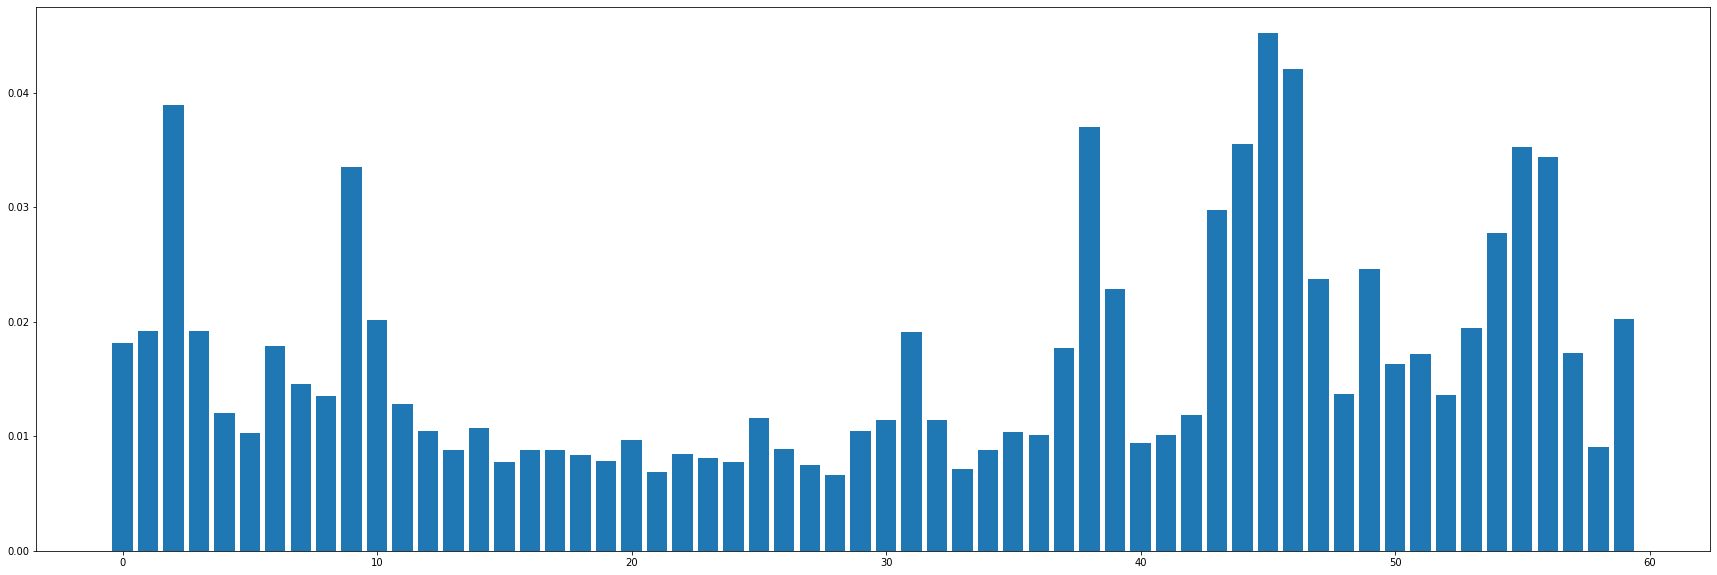

In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot

importance = rf_best.feature_importances_
# summarize feature importance

pyplot.figure(figsize=(30, 10))
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
pesos = pd.DataFrame(importance)
pesos = pesos.astype(float)
pesos.head()

,0
0,0.018135
1,0.019234
2,0.038931
3,0.019228
4,0.012037


In [ ]:
indices = X_train.columns
dfindices = DataFrame (indices,columns=['Features'])
#dfindices

In [ ]:
pesos = pd.concat([dfindices, pesos], axis=1)
pesos = pesos.rename(columns={0: 'pesos'})
#pesos

In [ ]:
pesos = pesos.rename(columns={0: 'var'})
#pesos
pesos.pesos=pd.to_numeric(pesos.pesos)
pesos.sort_values("pesos", ascending=False, inplace=True)
pesos = pesos.head(10)

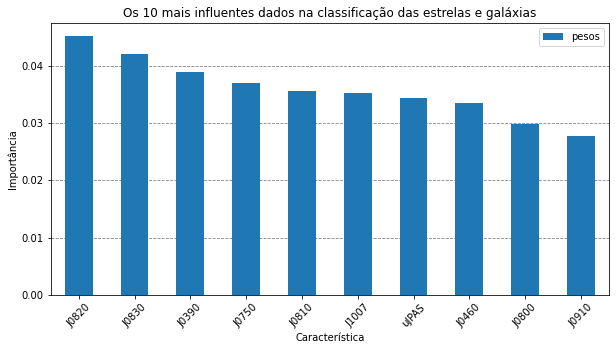

In [ ]:
plt.figure(figsize=(10,5))  
ax = plt.gca()                                              
plt.title('Os 10 mais influentes dados na classificação das estrelas e galáxias')            

pesos.plot(kind='bar', x= 'Features', ax=ax) 

plt.ylabel('Importância')                                              
plt.xlabel('Característica')                                            
plt.xticks(rotation=45)                                          
ax.set_axisbelow(True)  
ax.yaxis.grid(color='gray', linestyle='dashed') 

In [ ]:
x_test = pesos = pd.DataFrame(rf_best.predict(X_test))
x_test

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
2289,0.0
2290,0.0
2291,0.0
2292,0.0


In [ ]:
y_test = pd.DataFrame(y_test)
y_test

,pdf
9890,0.0
6908,0.0
7159,0.0
13687,1.0
1856,0.0
...,...
14680,0.0
13218,1.0
13026,0.0
3200,0.0


In [ ]:
X_test

,uJAVA,J0378,J0390,J0400,J0410,J0420,J0430,J0440,J0450,J0460,J0470,J0480,J0490,J0500,J0510,J0520,J0530,J0540,J0550,J0560,J0570,J0580,J0590,J0600,J0610,J0620,J0630,J0640,J0650,J0660,J0670,J0680,J0690,J0700,J0710,J0720,J0730,J0740,J0750,J0760,J0770,J0780,J0790,J0800,J0810,J0820,J0830,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,uJPAS,gSDSS,rSDSS,iSDSS
9890,24.513,23.129,24.835,24.020,99.000,24.381,25.055,23.411,99.000,22.581,99.000,22.607,22.099,22.309,22.572,21.458,22.312,21.929,21.937,22.112,21.069,21.499,21.373,21.087,21.093,21.381,20.822,21.174,20.962,20.792,20.930,20.543,20.728,20.595,20.480,20.635,21.141,20.683,20.520,20.307,20.790,20.431,20.587,20.517,20.733,20.629,20.380,20.844,20.415,20.298,20.207,20.445,20.252,20.099,20.766,20.430,23.197,22.767,21.034,20.578
6908,99.000,23.151,24.568,24.855,99.000,23.087,23.927,99.000,99.000,22.680,23.706,99.000,23.244,23.058,99.000,23.102,22.592,22.311,22.224,23.124,21.802,22.053,21.795,21.737,21.983,21.621,22.484,23.561,21.433,21.599,21.274,21.410,21.359,21.444,21.099,21.144,21.150,21.379,20.984,22.498,20.592,20.960,20.742,20.673,20.600,21.668,20.569,20.785,21.219,21.662,20.855,20.787,20.876,20.513,20.830,20.240,23.333,23.757,21.825,21.315
7159,21.743,22.107,22.004,21.507,99.000,99.000,20.934,22.101,20.847,21.901,22.247,21.757,21.136,20.706,21.098,20.655,20.511,20.354,20.485,20.078,20.107,20.015,19.867,19.856,19.677,20.083,19.567,19.790,19.754,19.845,19.745,19.773,19.636,19.172,19.685,19.411,19.202,19.433,19.459,19.418,19.404,19.069,19.215,19.225,19.452,19.284,19.117,19.611,19.560,19.158,19.111,19.042,18.987,18.856,19.147,18.857,22.348,21.427,19.806,19.300
13687,99.000,24.516,23.826,99.000,24.836,99.000,24.420,23.462,21.811,22.827,22.982,22.251,22.775,22.449,22.558,22.813,21.879,22.085,22.054,21.853,21.489,22.110,22.671,21.531,21.481,21.662,21.211,21.173,20.751,20.981,21.278,21.115,21.023,20.673,20.756,20.740,20.284,20.109,20.094,20.004,20.316,20.039,19.939,19.810,19.834,19.786,19.876,19.634,19.787,19.709,19.737,19.821,19.686,19.725,19.700,19.524,99.000,22.815,21.362,20.080
1856,23.598,26.077,23.059,23.069,23.050,99.000,23.362,23.300,22.377,23.300,25.926,23.036,99.000,23.362,22.773,22.387,27.481,24.444,25.641,23.097,22.208,22.989,21.897,22.096,23.058,99.000,24.444,22.682,22.135,22.325,22.729,22.091,22.889,22.319,22.044,21.813,22.440,21.810,22.483,22.085,21.670,21.461,21.773,23.040,21.404,22.388,22.986,22.139,21.542,22.209,22.227,22.947,21.023,21.579,22.478,21.363,23.639,23.309,22.437,22.214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14680,23.039,22.015,22.274,22.788,22.174,24.363,22.150,22.026,21.163,22.978,23.350,22.823,22.670,22.505,22.050,22.520,22.162,22.200,21.313,21.900,22.145,23.483,22.252,21.750,21.767,99.000,21.525,21.717,21.973,21.861,21.581,21.931,23.569,22.409,21.821,21.387,21.054,21.290,21.346,20.572,21.648,21.852,21.979,21.707,21.406,20.974,20.720,21.358,21.345,21.151,21.168,21.755,22.175,21.077,21.197,22.109,23.724,22.562,21.858,21.091
13218,24.492,99.000,99.000,24.220,99.000,99.000,24.020,24.852,99.000,23.629,24.663,24.593,99.000,23.931,24.400,23.518,23.349,23.242,24.309,22.458,23.424,23.372,22.928,23.158,23.614,23.307,23.601,22.456,22.461,22.393,22.832,22.863,22.310,21.648,22.234,22.551,22.155,21.335,21.200,21.424,21.299,21.420,21.045,20.788,21.098,20.764,20.856,20.873,21.293,20.858,20.928,20.778,20.830,20.779,20.933,20.789,99.000,24.134,22.739,21.272
13026,22.851,22.424,22.887,23.399,22.167,23.194,22.715,22.779,21.801,22.218,22.777,21.980,22.015,22.566,22.700,23.012,22.404,22.604,21.926,22.178,22.378,23.192,24.060,22.155,22.395,99.000,24.158,22.387,22.430,22.525,22.461,23.159,22.046,99.000,22.526,22.816,21.509,22.176,22.183,21.166,25.286,24.722,23.148,22.000,22.310,21.916,21.512,24.584,99.000,22.458,21.555,21.185,99.000,99.000,22.843,22.439,23.038,22.240,22.24

In [ ]:
errados = pd.concat([X_test, y_test], axis=1)
errados.sort_values("pdf")

,uJAVA,J0378,J0390,J0400,J0410,J0420,J0430,J0440,J0450,J0460,J0470,J0480,J0490,J0500,J0510,J0520,J0530,J0540,J0550,J0560,J0570,J0580,J0590,J0600,J0610,J0620,J0630,J0640,J0650,J0660,J0670,J0680,J0690,J0700,J0710,J0720,J0730,J0740,J0750,J0760,J0770,J0780,J0790,J0800,J0810,J0820,J0830,J0840,J0850,J0860,J0870,J0880,J0890,J0900,J0910,J1007,uJPAS,gSDSS,rSDSS,iSDSS,pdf
9890,24.513,23.129,24.835,24.020,99.000,24.381,25.055,23.411,99.000,22.581,99.000,22.607,22.099,22.309,22.572,21.458,22.312,21.929,21.937,22.112,21.069,21.499,21.373,21.087,21.093,21.381,20.822,21.174,20.962,20.792,20.930,20.543,20.728,20.595,20.480,20.635,21.141,20.683,20.520,20.307,20.790,20.431,20.587,20.517,20.733,20.629,20.380,20.844,20.415,20.298,20.207,20.445,20.252,20.099,20.766,20.430,23.197,22.767,21.034,20.578,0.0
10846,99.000,99.000,23.737,99.000,21.539,22.666,99.000,22.574,22.797,22.827,22.385,23.466,22.515,21.544,22.029,23.712,21.786,22.433,21.809,99.000,21.653,21.428,20.803,21.304,21.652,21.083,20.765,20.932,21.283,21.246,20.972,20.930,21.087,20.441,20.701,20.835,20.683,20.757,20.509,20.715,21.863,20.803,21.570,20.544,21.660,22.120,20.223,21.189,20.567,20.320,20.195,21.500,21.785,20.170,20.570,20.141,22.478,22.340,21.231,20.799,0.0
9132,22.463,99.000,22.491,22.185,99.000,23.265,22.504,22.177,99.000,21.478,21.210,21.595,21.145,21.274,21.396,21.734,21.286,21.881,21.205,21.646,21.211,21.281,20.762,21.251,20.981,22.059,20.976,21.239,21.176,20.959,21.113,21.134,21.728,20.767,21.047,21.094,20.663,21.587,20.747,21.346,21.532,20.470,20.820,21.051,20.267,20.594,20.745,20.685,20.621,20.970,20.641,22.050,20.913,21.135,21.086,21.109,22.628,21.589,21.080,21.010,0.0
7650,23.283,99.000,22.989,22.958,23.445,99.000,22.510,23.820,99.000,25.006,99.000,24.089,22.357,22.038,23.141,23.089,21.962,22.289,22.669,22.422,21.557,22.978,22.557,99.000,99.000,22.934,23.801,22.874,22.757,22.334,22.500,22.817,21.689,99.000,22.088,22.095,99.000,21.622,21.350,22.483,21.031,99.000,21.874,99.000,21.096,99.000,20.913,99.000,21.413,99.000,21.611,20.905,99.000,99.000,20.728,21.002,23.917,23.943,22.689,22.083,0.0
14834,22.072,21.563,23.655,99.000,21.405,28.596,99.000,22.338,22.081,21.677,22.963,21.213,21.238,22.994,21.100,23.180,21.615,20.982,21.116,24.776,21.914,21.171,21.647,21.571,21.488,20.829,21.811,20.911,22.507,21.526,21.039,21.327,22.905,20.858,21.066,20.725,21.185,20.937,20.308,21.174,22.009,99.000,20.387,20.953,20.332,20.520,19.971,20.887,20.190,21.015,23.466,21.155,21.231,22.539,21.200,20.992,22.257,22.086,21.643,21.140,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,24.176,24.799,23.566,25.142,99.000,99.000,99.000,99.000,99.000,25.300,24.712,23.360,23.504,23.220,23.499,22.335,22.687,22.179,24.211,25.825,23.665,22.185,22.045,22.269,22.288,23.532,21.902,21.491,21.197,21.261,21.851,21.707,21.351,21.007,21.189,21.158,20.437,20.078,20.098,19.874,20.457,20.273,20.120,19.787,19.343,19.424,19.437,19.361,19.558,19.494,19.304,19.284,19.425,19.648,19.320,19.151,23.549,23.885,21.751,19.977,1.0
3196,22.331,22.126,21.852,21.216,20.955,21.258,20.747,20.107,19.708,19.566,19.464,19.601,19.373,19.420,19.442,19.321,18.979,18.832,18.771,18.649,18.546,18.422,18.485,18.338,18.237,18.405,18.236,18.099,17.958,17.927,18.000,18.052,17.960,17.752,17.756,17.725,17.548,17.482,17.413,17.389,17.375,17.357,17.297,17.276,17.218,17.198,17.195,17.169,17.196,17.177,17.222,17.137,17.098,17.094,17.027,17.041,22.507,19.625,18.189,17.441,1.0
11276,23.970,99.000,23.492,22.540,22.949,22.265,21.965,22.039,21.464,21.135,21.076,21.183,21.251,21.122,21.439,21.176,20.761,20.571,20.521,20.380,20.123,20.490,20.368,20.082,20.108,20.119,20.066,19.850,19.992,19.850,19.977,19.880,19.850,19.767,19.628,19.728,19.604,19.690,19.425,19.337,19.471,19.361,19.343,19.243,19.215,19.162,19.350,19.215,19.250,19.227,19.294,19.236,19.223,19.12